# Libraries

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Peak demand

In [2]:
# Import data from CSV file
# Data: daily peak demand

data_pk_init = pd.read_csv('data/pic_journalier_consommation_brute.csv', 
                   sep=';', 
                   names=['date','power','temp_avg','temp_ref'], 
                   skiprows=[0], 
                   parse_dates=[0])
data_pk_init.head()

,date,power,temp_avg,temp_ref
0,2014-09-27,48050.0,16.9,15.5
1,2014-10-04,47901.0,16.2,14.6
2,2014-10-09,56556.0,17.0,13.9
3,2014-10-18,49122.0,18.1,12.7
4,2014-10-25,52035.0,13.7,11.7


In [3]:
# Sort data by date

data_pk = data_pk_init.sort_values('date')
data_pk = data_pk.reset_index(drop=True)
data_pk.head()

,date,power,temp_avg,temp_ref
0,2012-01-01,58414.0,11.7,4.6
1,2012-01-02,73329.0,8.4,4.6
2,2012-01-03,76730.0,8.4,4.6
3,2012-01-04,78387.0,8.1,4.6
4,2012-01-05,78491.0,9.2,4.6


In [4]:
# Computation of the record demand over time

record_load = 0
data_record = data_pk[['date','power']]
for idx,val in enumerate(data_pk.power):
    if val>record_load:
        record_load = val
    else:    
        data_record.at[idx, 'power'] = record_load
data_record.tail()

,date,power
2246,2018-02-24,102098.0
2247,2018-02-25,102098.0
2248,2018-02-26,102098.0
2249,2018-02-27,102098.0
2250,2018-02-28,102098.0


In [5]:
print("Record load: " + str(record_load/1e3) + " GW")

Record load: 102.098 GW


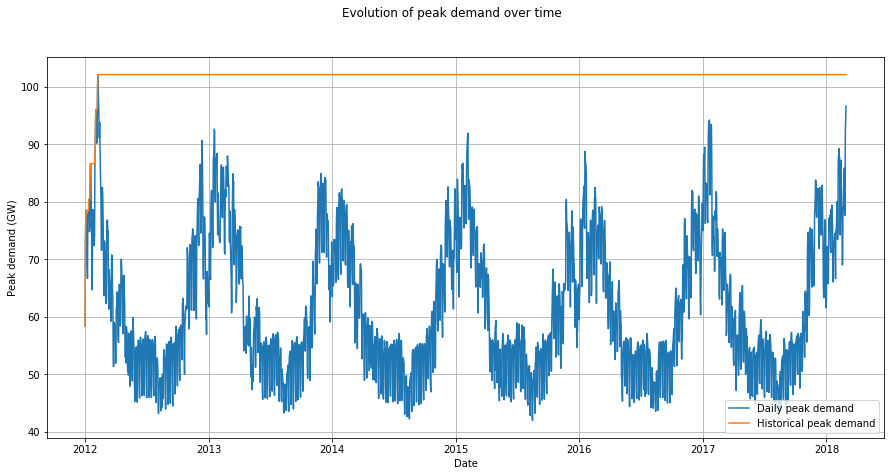

In [6]:
# Plot evolution of peak demand over time

fig_pk = plt.figure(figsize=(15,7))
plt.plot(data_pk.date, data_pk.power/1e3, label='Daily peak demand')
plt.plot(data_record.date, data_record.power/1e3, label='Historical peak demand')
fig_pk.suptitle('Evolution of peak demand over time')
plt.xlabel('Date')
plt.ylabel('Peak demand (GW)')
plt.grid()
plt.legend()

# Thermosensitivity

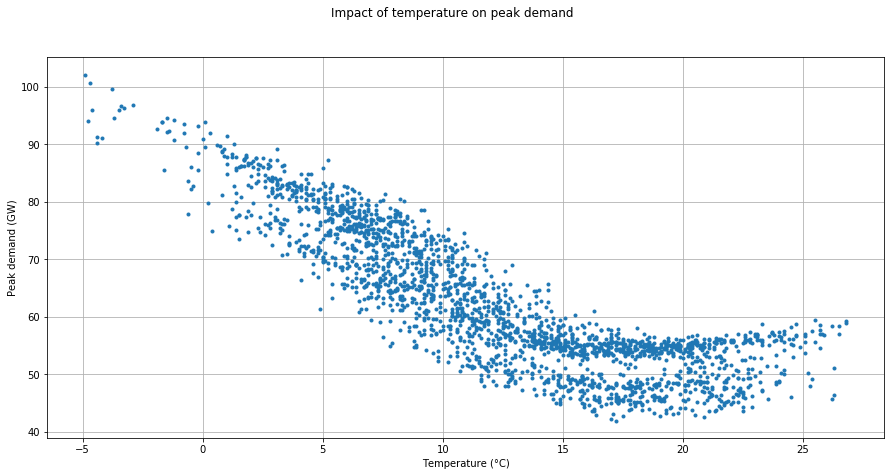

In [7]:
# Plot the relation between temperature and peak load

fig_sens = plt.figure(figsize=(15,7))
plt.plot(data_pk.temp_avg, data_pk.power/1e3, '.')
fig_sens.suptitle('Impact of temperature on peak demand')
plt.xlabel('Temperature (°C)')
plt.ylabel('Peak demand (GW)')
plt.grid()

# Installed capacity

In [8]:
# Import data from CSV file
# Data: installed capacity of each type

data_cap_init = pd.read_csv('data/parc_prod_par_filiere.csv', 
                   sep=';', 
                   names=['year','fossil_fuels','oil','coal','natural_gas','hydro','nuclear','solar','wind','biomass'], 
                   skiprows=[0], 
                   parse_dates=[0])
data_cap_init.head()

,year,fossil_fuels,oil,coal,natural_gas,hydro,nuclear,solar,wind,biomass
0,2009-01-01,26154.6,NaN,NaN,NaN,25356.9,63130.0,190.0,4573.0,1029.0
1,2013-01-01,25706.7,8948.0,6359.0,10400.0,25434.0,63130.0,4366.0,8157.0,1496.1
2,2014-01-01,23750.9,8893.2,4508.0,10349.8,25415.3,63130.0,5295.9,9271.4,1598.1
3,2007-01-01,24055.0,NaN,NaN,NaN,25413.0,63260.0,7.0,2252.0,953.0
4,2008-01-01,24665.0,NaN,NaN,NaN,25360.0,63260.0,30.0,3327.0,986.3


In [9]:
# Sort data by date

data_cap = data_cap_init.sort_values('year')
data_cap = data_cap.reset_index(drop=True)
data_cap.head()

,year,fossil_fuels,oil,coal,natural_gas,hydro,nuclear,solar,wind,biomass
0,2007-01-01,24055.0,NaN,NaN,NaN,25413.0,63260.0,7.0,2252.0,953.0
1,2008-01-01,24665.0,NaN,NaN,NaN,25360.0,63260.0,30.0,3327.0,986.3
2,2009-01-01,26154.6,NaN,NaN,NaN,25356.9,63130.0,190.0,4573.0,1029.0
3,2010-01-01,27399.0,10494.0,7942.0,8963.0,25392.0,63130.0,878.0,5762.0,1223.9
4,2011-01-01,27813.0,10332.0,7942.0,9539.0,25393.9,63130.0,2584.0,6714.0,1237.0


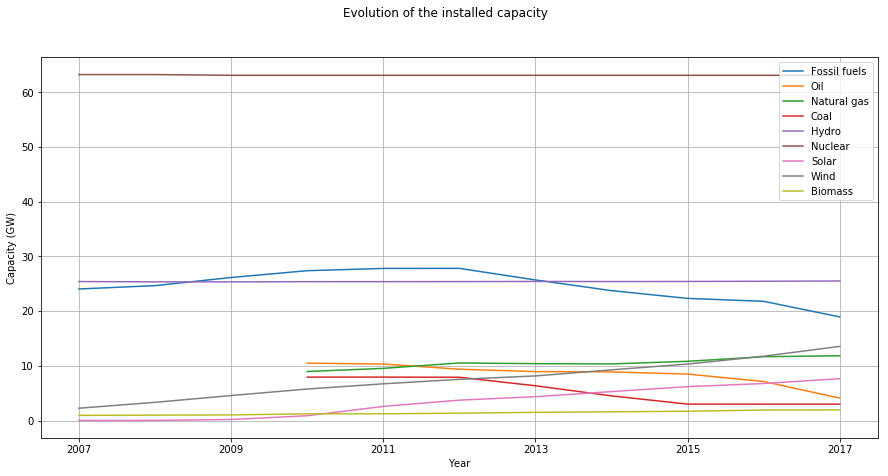

In [10]:
# Plot the evolution of the installed capacity of each type

fig_cap1 = plt.figure(figsize=(15,7))
plt.plot(data_cap.year, data_cap.fossil_fuels/1e3, label='Fossil fuels')
plt.plot(data_cap.year, data_cap.oil/1e3, label='Oil') 
plt.plot(data_cap.year, data_cap.natural_gas/1e3, label='Natural gas') 
plt.plot(data_cap.year, data_cap.coal/1e3, label='Coal') 
plt.plot(data_cap.year, data_cap.hydro/1e3, label='Hydro') 
plt.plot(data_cap.year, data_cap.nuclear/1e3, label='Nuclear') 
plt.plot(data_cap.year, data_cap.solar/1e3, label='Solar') 
plt.plot(data_cap.year, data_cap.wind/1e3, label='Wind')
plt.plot(data_cap.year, data_cap.biomass/1e3, label='Biomass')
fig_cap1.suptitle('Evolution of the installed capacity')
plt.ylabel('Capacity (GW)')
plt.xlabel('Year')
plt.grid()
plt.legend()

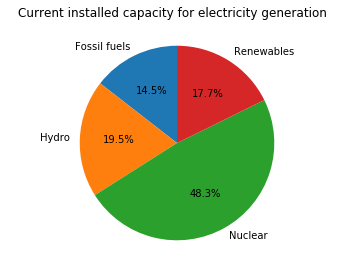

In [11]:
# Current energy mix

labels = 'Fossil fuels', 'Hydro', 'Nuclear', 'Renewables'
sizes = [data_cap.fossil_fuels.iloc[-1]/1e3, 
         data_cap.hydro.iloc[-1]/1e3, 
         data_cap.nuclear.iloc[-1]/1e3, 
         (data_cap.solar.iloc[-1] + data_cap.wind.iloc[-1] + data_cap.biomass.iloc[-1])/1e3]
fig_pie, ax_pie = plt.subplots()
fig_pie.suptitle('Current installed capacity for electricity generation')
ax_pie.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax_pie.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

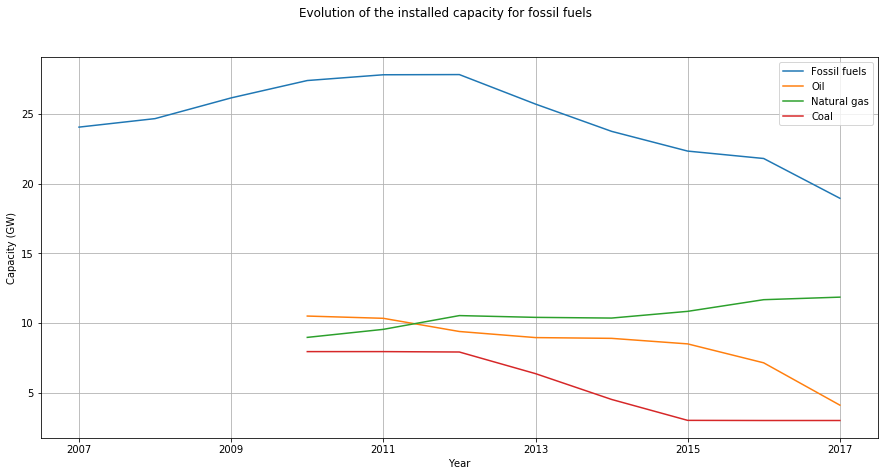

In [12]:
# Plot the evolution of the installed capacity of fossil fuels

fig_cap2 = plt.figure(figsize=(15,7))
plt.plot(data_cap.year, data_cap.fossil_fuels/1e3, label='Fossil fuels')
plt.plot(data_cap.year, data_cap.oil/1e3, label='Oil') 
plt.plot(data_cap.year, data_cap.natural_gas/1e3, label='Natural gas') 
plt.plot(data_cap.year, data_cap.coal/1e3, label='Coal') 
fig_cap2.suptitle('Evolution of the installed capacity for fossil fuels')
plt.ylabel('Capacity (GW)')
plt.xlabel('Year')
plt.grid()
plt.legend()

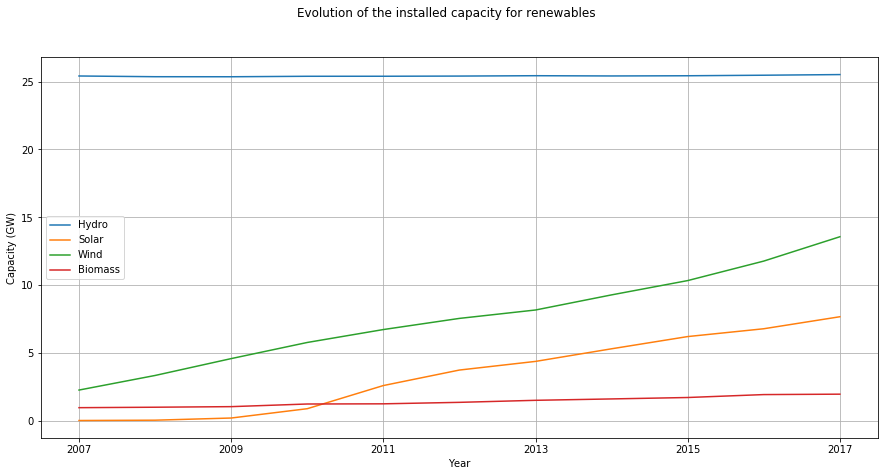

In [13]:
# Plot the evolution of the installed capacity of renewables

fig_cap3 = plt.figure(figsize=(15,7))
plt.plot(data_cap.year, data_cap.hydro/1e3, label='Hydro') 
plt.plot(data_cap.year, data_cap.solar/1e3, label='Solar') 
plt.plot(data_cap.year, data_cap.wind/1e3, label='Wind')
plt.plot(data_cap.year, data_cap.biomass/1e3, label='Biomass')
fig_cap3.suptitle('Evolution of the installed capacity for renewables')
plt.ylabel('Capacity (GW)')
plt.xlabel('Year')
plt.grid()
plt.legend()

# Load analysis

In [15]:
# Import data from CSV file
# Data: load (every 30 min.)

data_load_init = pd.read_csv('data/cdc_conso.csv', 
                   sep=',', 
                   names=['time','date','hour','load','type'], 
                   infer_datetime_format = True,
                   skiprows=[0])
data_load_init.head()

,time,date,hour,load,type
0,2008-01-01T00:00:00+01:00,2008-01-01,00:00,67027.829,Définitive
1,2008-01-01T00:30:00+01:00,2008-01-01,00:30,65611.626,Définitive
2,2008-01-01T01:00:00+01:00,2008-01-01,01:00,63949.610,Définitive
3,2008-01-01T01:30:00+01:00,2008-01-01,01:30,64198.337,Définitive
4,2008-01-01T02:00:00+01:00,2008-01-01,02:00,64190.632,Définitive


In [16]:
# Sort data by date

data_load = data_load_init.sort_values('time')
data_load = data_load.reset_index(drop=True)
data_load.head()

,time,date,hour,load,type
0,2008-01-01T00:00:00+01:00,2008-01-01,00:00,67027.829,Définitive
1,2008-01-01T00:30:00+01:00,2008-01-01,00:30,65611.626,Définitive
2,2008-01-01T01:00:00+01:00,2008-01-01,01:00,63949.610,Définitive
3,2008-01-01T01:30:00+01:00,2008-01-01,01:30,64198.337,Définitive
4,2008-01-01T02:00:00+01:00,2008-01-01,02:00,64190.632,Définitive


In [17]:
# Extract data from 2017

min_year = 2008
max_year = 2017
pts_per_year = 8760*2
pts_bisex = 24*2*3 # 2016, 2012, 2008
first_pt = (max_year-min_year)*(pts_per_year) + pts_bisex
last_pt = first_pt + pts_per_year
data_load_last = data_load[first_pt:last_pt]
data_load_last.tail()

,time,date,hour,load,type
175339,2017-12-31T21:30:00+01:00,2017-12-31,21:30,56505.0,Intermédiaire
175340,2017-12-31T22:00:00+01:00,2017-12-31,22:00,56000.0,Intermédiaire
175341,2017-12-31T22:30:00+01:00,2017-12-31,22:30,56995.0,Intermédiaire
175342,2017-12-31T23:00:00+01:00,2017-12-31,23:00,60395.0,Intermédiaire
175343,2017-12-31T23:30:00+01:00,2017-12-31,23:30,60230.0,Intermédiaire


# To be continued...